In [1]:
!pip install unsloth

In [2]:
!pip install datasets

In [3]:
#datasetimizi yukleyelim
from datasets import load_dataset

dataset = load_dataset("Amod/mental_health_counseling_conversations")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

combined_dataset.json:   0%|          | 0.00/4.79M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3512 [00:00<?, ? examples/s]

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Context', 'Response'],
        num_rows: 3512
    })
})

In [ ]:
dataset['train']

Dataset({
    features: ['Context', 'Response'],
    num_rows: 3512
})

In [5]:
dataset['train'][0]

{'Context': "I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n   I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n   How can I change my feeling of being worthless to everyone?",
 'Response': "If everyone thinks you're worthless, then maybe you need to find new people to hang out with.Seriously, the social context in which a person lives is a big influence in self-esteem.Otherwise, you can go round and round trying to understand why you're not worthless, then go back to the same crowd and be knocked down again.There are many inspirational messages you can find in social media. \xa0Maybe read some of the ones which state that no person is worthless, and that everyone has a good purpose to their life.Also, since our culture is so saturated with the belief that if someone doesn't feel good about themselves that this is someh

In [6]:
dataset['train'][0]['Context']

"I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n   I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n   How can I change my feeling of being worthless to everyone?"

In [7]:
dataset['train'][0]['Response']

"If everyone thinks you're worthless, then maybe you need to find new people to hang out with.Seriously, the social context in which a person lives is a big influence in self-esteem.Otherwise, you can go round and round trying to understand why you're not worthless, then go back to the same crowd and be knocked down again.There are many inspirational messages you can find in social media. \xa0Maybe read some of the ones which state that no person is worthless, and that everyone has a good purpose to their life.Also, since our culture is so saturated with the belief that if someone doesn't feel good about themselves that this is somehow terrible.Bad feelings are part of living. \xa0They are the motivation to remove ourselves from situations and relationships which do us more harm than good.Bad feelings do feel terrible. \xa0 Your feeling of worthlessness may be good in the sense of motivating you to find out that you are much better than your feelings today."

In [8]:
data=[]
for x in dataset['train']:
  data.append(x)

In [9]:
len(data)

3512

In [10]:
type(data)

list

In [11]:
import pandas as pd
df=pd.DataFrame(data)
df

,Context,Response
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb..."
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see..."
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...
3,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...
4,I'm going through some things with my feelings...,I first want to let you know that you are not ...
...,...,...
3507,My grandson's step-mother sends him to school ...,Absolutely not! It is never in a child's best ...
3508,My boyfriend is in recovery from drug addictio...,I'm sorry you have tension between you and you...
3509,The birth mother attempted suicide several tim...,"The true answer is, ""no one can really say wit..."
3510,I think adult life is making him depressed and...,How do you help yourself to believe you requir...


In [12]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [13]:
import torch
from trl import SFTTrainer #Hugging Face'in SFTTrainer sınıfı, ince ayar yapmak için bir araç sağlar.
from transformers import TrainingArguments, TextStreamer #Hugging Face Transformers kitaplığından eğitim argümanları ve metin akışını yöneten sınıflar dahil ediliyor.
from unsloth.chat_templates import get_chat_template
from unsloth import FastLanguageModel
from datasets import Dataset
from unsloth import is_bfloat16_supported #bfloat16 desteğini kontrol ediyor.
# Saving model
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3512 entries, 0 to 3511
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Context   3512 non-null   object
 1   Response  3512 non-null   object
dtypes: object(2)
memory usage: 55.0+ KB


In [15]:
df.columns

Index(['Context', 'Response'], dtype='object')

In [16]:
df['Context_length'] = df['Context'].apply(len)
df

,Context,Response,Context_length
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb...",328
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see...",328
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...,328
3,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...,328
4,I'm going through some things with my feelings...,I first want to let you know that you are not ...,328
...,...,...,...
3507,My grandson's step-mother sends him to school ...,Absolutely not! It is never in a child's best ...,98
3508,My boyfriend is in recovery from drug addictio...,I'm sorry you have tension between you and you...,159
3509,The birth mother attempted suicide several tim...,"The true answer is, ""no one can really say wit...",413
3510,I think adult life is making him depressed and...,How do you help yourself to believe you requir...,356


In [17]:
df['Context_length']

,Context_length
0,328
1,328
2,328
3,328
4,328
...,...
3507,98
3508,159
3509,413
3510,356


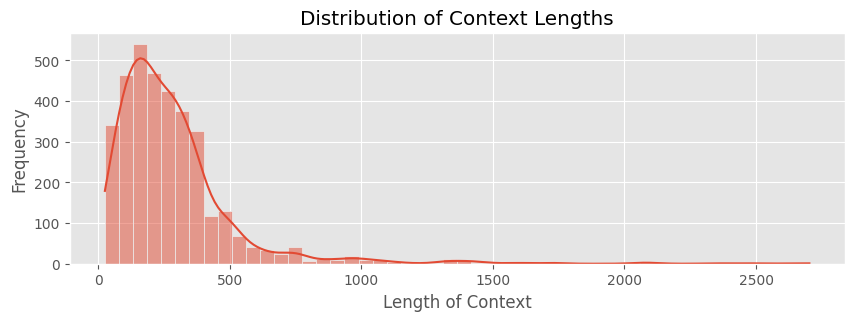

In [18]:
plt.figure(figsize=(10, 3))
sns.histplot(df['Context_length'], bins=50, kde=True)
plt.title('Distribution of Context Lengths')
plt.xlabel('Length of Context')
plt.ylabel('Frequency')
plt.show()

In [19]:
df[df['Context_length']>1500]

,Context,Response,Context_length
309,My fiancée suffers from severe anxiety and dep...,It sounds like you have been a positive suppor...,1605
713,My fiancé and I have been in a relationship fo...,"Hi Bethlehem,You have a big decision to make. ...",1594
940,"I'm a young adult woman, and I have trouble fi...","What a tough situation you must be in, feeling...",2055
1014,"I'm a teenager, and throughout my entire life,...",Thank you for reaching out and I can see that ...,2591
1023,My boyfriend and I have been together for five...,"Hi Winters, I learned a long time ago that I c...",2471
1028,I’ve known my boyfriend for several years. We ...,There are plenty of red flags that you have be...,1724
1268,I've been with my husband for eight years now....,"Hi Jayuya, I'm struggling in this moment with ...",2347
1444,I am constantly having problems with the same ...,Hi. I appreciate your mature instincts and str...,1731
1625,"About two and a half months ago, I met a woman...",That sounds really heartbreaking. It is tough ...,2092
1626,"About two and a half months ago, I met a woman...",Love doesn't hurt.Your description of the rela...,2092


In [21]:
df[df['Context_length']>2000]

,Context,Response,Context_length
940,"I'm a young adult woman, and I have trouble fi...","What a tough situation you must be in, feeling...",2055
1014,"I'm a teenager, and throughout my entire life,...",Thank you for reaching out and I can see that ...,2591
1023,My boyfriend and I have been together for five...,"Hi Winters, I learned a long time ago that I c...",2471
1268,I've been with my husband for eight years now....,"Hi Jayuya, I'm struggling in this moment with ...",2347
1625,"About two and a half months ago, I met a woman...",That sounds really heartbreaking. It is tough ...,2092
1626,"About two and a half months ago, I met a woman...",Love doesn't hurt.Your description of the rela...,2092
1643,"Every once and a while, I think about my ex-bo...",If you're in a relationship and you're having ...,2702
2308,"Every once and a while, I think about my ex-bo...",If you're in a relationship and you're having ...,2703
2399,"About two and a half months ago, I met a woman...",Love doesn't hurt.Your description of the rela...,2092
2405,"About two and a half months ago, I met a woman...",That sounds really heartbreaking. It is tough ...,2092


In [22]:
df[df['Context_length']>2500]

,Context,Response,Context_length
1014,"I'm a teenager, and throughout my entire life,...",Thank you for reaching out and I can see that ...,2591
1643,"Every once and a while, I think about my ex-bo...",If you're in a relationship and you're having ...,2702
2308,"Every once and a while, I think about my ex-bo...",If you're in a relationship and you're having ...,2703


In [20]:
df[df['Context_length']>1500].info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 309 to 2497
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Context         21 non-null     object
 1   Response        21 non-null     object
 2   Context_length  21 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 672.0+ bytes


In [23]:
filtered_data = df[df['Context_length'] <= 1500]
filtered_data


,Context,Response,Context_length
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb...",328
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see...",328
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...,328
3,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...,328
4,I'm going through some things with my feelings...,I first want to let you know that you are not ...,328
...,...,...,...
3507,My grandson's step-mother sends him to school ...,Absolutely not! It is never in a child's best ...,98
3508,My boyfriend is in recovery from drug addictio...,I'm sorry you have tension between you and you...,159
3509,The birth mother attempted suicide several tim...,"The true answer is, ""no one can really say wit...",413
3510,I think adult life is making him depressed and...,How do you help yourself to believe you requir...,356


In [24]:
ln_Context = filtered_data['Context'].apply(len)
ln_Context

,Context
0,328
1,328
2,328
3,328
4,328
...,...
3507,98
3508,159
3509,413
3510,356


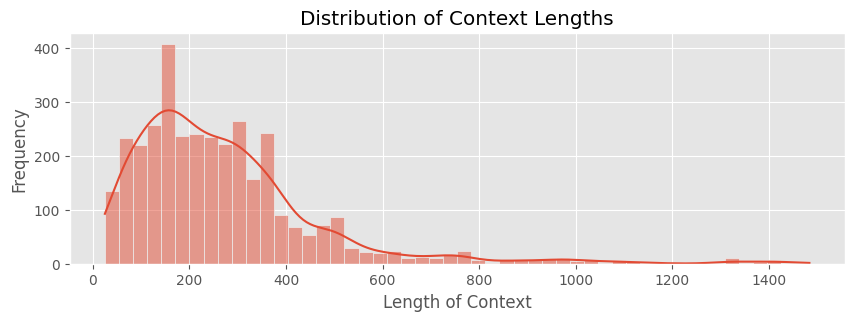

In [25]:
ln_Context = filtered_data['Context'].apply(len)
plt.figure(figsize=(10, 3))
sns.histplot(ln_Context, bins=50, kde=True)
plt.title('Distribution of Context Lengths')
plt.xlabel('Length of Context')
plt.ylabel('Frequency')
plt.show()

In [26]:
ln_Response = filtered_data['Response'].apply(len)
ln_Response

,Response
0,961
1,2082
2,299
3,844
4,337
...,...
3507,854
3508,882
3509,682
3510,218


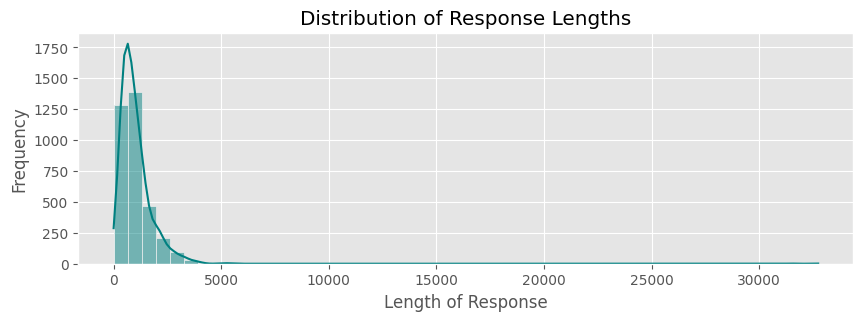

In [27]:
plt.figure(figsize=(10, 3))
sns.histplot(ln_Response, bins=50, kde=True, color='teal')
plt.title('Distribution of Response Lengths')
plt.xlabel('Length of Response')
plt.ylabel('Frequency')
plt.show()

In [28]:
filtered_data

,Context,Response,Context_length
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb...",328
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see...",328
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...,328
3,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...,328
4,I'm going through some things with my feelings...,I first want to let you know that you are not ...,328
...,...,...,...
3507,My grandson's step-mother sends him to school ...,Absolutely not! It is never in a child's best ...,98
3508,My boyfriend is in recovery from drug addictio...,I'm sorry you have tension between you and you...,159
3509,The birth mother attempted suicide several tim...,"The true answer is, ""no one can really say wit...",413
3510,I think adult life is making him depressed and...,How do you help yourself to believe you requir...,356


In [29]:
filtered_data['ln_Response']=filtered_data['Response'].apply(len)
filtered_data

,Context,Response,Context_length,ln_Response
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb...",328,961
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see...",328,2082
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...,328,299
3,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...,328,844
4,I'm going through some things with my feelings...,I first want to let you know that you are not ...,328,337
...,...,...,...,...
3507,My grandson's step-mother sends him to school ...,Absolutely not! It is never in a child's best ...,98,854
3508,My boyfriend is in recovery from drug addictio...,I'm sorry you have tension between you and you...,159,882
3509,The birth mother attempted suicide several tim...,"The true answer is, ""no one can really say wit...",413,682
3510,I think adult life is making him depressed and...,How do you help yourself to believe you requir...,356,218


In [30]:
filtered_data[filtered_data['ln_Response']>5000]

,Context,Response,Context_length,ln_Response
815,How do I decide if I should end my relationshi...,Previous counselors have discussed very good p...,66,5499
897,My wife is always accusing me of cheating and ...,Hello. That must be very frustrating for you t...,362,5250
2487,I've recently thought that i could be transgen...,"Hello Frostproof,Thinking about becoming trans...",88,31495
2624,"I get so much anxiety, and I don’t know why. I...",The other two post answers to your question ar...,122,32739
3144,My wife is always accusing me of cheating and ...,Hello. That must be very frustrating for you t...,364,5250


In [31]:
filtered_data = filtered_data[filtered_data['ln_Response'] <= 4000]
filtered_data

,Context,Response,Context_length,ln_Response
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb...",328,961
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see...",328,2082
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...,328,299
3,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...,328,844
4,I'm going through some things with my feelings...,I first want to let you know that you are not ...,328,337
...,...,...,...,...
3507,My grandson's step-mother sends him to school ...,Absolutely not! It is never in a child's best ...,98,854
3508,My boyfriend is in recovery from drug addictio...,I'm sorry you have tension between you and you...,159,882
3509,The birth mother attempted suicide several tim...,"The true answer is, ""no one can really say wit...",413,682
3510,I think adult life is making him depressed and...,How do you help yourself to believe you requir...,356,218


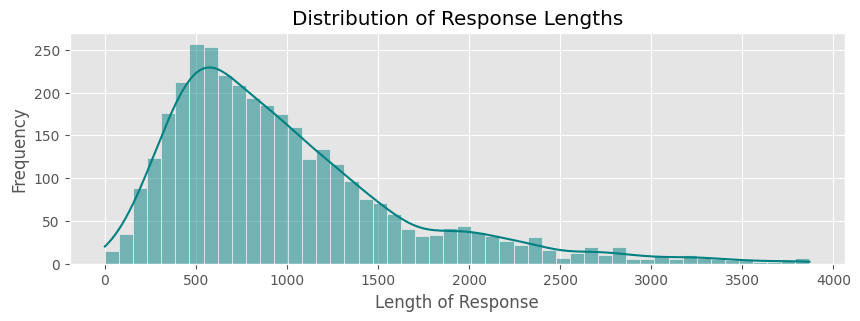

In [32]:

plt.figure(figsize=(10, 3))
sns.histplot(filtered_data['ln_Response'], bins=50, kde=True, color='teal')
plt.title('Distribution of Response Lengths')
plt.xlabel('Length of Response')
plt.ylabel('Frequency')
plt.show()